<a href="https://colab.research.google.com/github/Manu8271/honeypot/blob/main/Capstone_honeypot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AWS_Honeypot.csv to AWS_Honeypot.csv


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
print(f"version: {sklearn.__version__}")

version: 1.2.2


In [15]:
import io
df = pd.read_csv(io.BytesIO(uploaded["AWS_Honeypot.csv"]))
print(df)

            datetime               host         src proto  type      spt  \
0       3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
1       3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0   
2       3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0   
3       3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0   
4       3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0   
...              ...                ...         ...   ...   ...      ...   
451576   9/8/13 5:54     groucho-oregon  1922977453   TCP   NaN  62175.0   
451577   9/8/13 5:50         groucho-eu  1017974360   TCP   NaN   6000.0   
451578   9/8/13 5:55     groucho-oregon  3234358955   TCP   NaN   6000.0   
451579   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   
451580   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   

           dpt           srcstr  cc        country         locale localeabbr  \
0      

In [5]:
df.head().T

,0,1,2,3,4
datetime,3/3/13 21:53,3/3/13 21:57,3/3/13 21:58,3/3/13 21:58,3/3/13 21:58
host,groucho-oregon,groucho-oregon,groucho-oregon,groucho-us-east,groucho-singapore
src,1032051418,1347834426,2947856490,841842716,3587648279
proto,TCP,UDP,TCP,UDP,TCP
type,NaN,NaN,NaN,NaN,NaN
spt,6000.0,5270.0,2489.0,43235.0,56577.0
dpt,1433.0,5060.0,1080.0,1900.0,80.0
srcstr,61.131.218.218,80.86.82.58,175.180.184.106,50.45.128.28,213.215.43.23
cc,CN,DE,TW,US,FR
country,China,Germany,Taiwan,United States,France


In [16]:
month_list = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'June.', 'July.', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
attack_date = {"year": [], "month": [], "day": [], "time": [], "hour": []}

for d_date in df['datetime']:
  d_date = d_date.split('/')
  mon = d_date[0]
  day = d_date[1]

  year_time = d_date[2].split(' ')
  year = year_time[0]
  time = year_time[1]


  attack_date["year"].append(year)
  attack_date["month"].append(month_list[int(mon) + 1])
  attack_date["day"].append(day)
  attack_date["time"].append(time)
  attack_date["hour"].append(f"{time.split(':')[0]}h")

df["year"] = attack_date["year"]
df["month"] = attack_date["month"]
df["day"] = attack_date["day"]
df["time"] = attack_date["time"]
df["hour"] = attack_date["hour"]

df = df.drop('type', axis=1)
df = df.drop('Unnamed: 15', axis=1)
df.head()

,datetime,host,src,proto,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,year,month,day,time,hour
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,13,May.,3,21:53,21h
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,13,May.,3,21:57,21h
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,13,May.,3,21:58,21h
3,3/3/13 21:58,groucho-us-east,841842716,UDP,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,13,May.,3,21:58,21h
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,13,May.,3,21:58,21h


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    451581 non-null  object 
 1   host        451581 non-null  object 
 2   src         451581 non-null  int64  
 3   proto       451581 non-null  object 
 4   spt         406770 non-null  float64
 5   dpt         406770 non-null  float64
 6   srcstr      451581 non-null  object 
 7   cc          447985 non-null  object 
 8   country     447947 non-null  object 
 9   locale      342112 non-null  object 
 10  localeabbr  331705 non-null  object 
 11  postalcode  86478 non-null   object 
 12  latitude    448112 non-null  float64
 13  longitude   448153 non-null  float64
 14  year        451581 non-null  object 
 15  month       451581 non-null  object 
 16  day         451581 non-null  object 
 17  time        451581 non-null  object 
 18  hour        451581 non-null  object 
dtypes:

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

d = df
d = d.drop('datetime', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

d.host = le.fit_transform(d.host)
d.proto = le.fit_transform(d.proto)
d.cc = le.fit_transform(d.cc)
d.country = le.fit_transform(d.country)
d.locale = le.fit_transform(d.locale)
d.month = le.fit_transform(d.month)

d = d.drop('srcstr', axis=1)
d = d.drop('localeabbr', axis=1)
d = d.drop('time', axis=1)
d = d.drop('hour', axis=1)
d = d.drop('postalcode', axis=1)
X = d
X = X.dropna()
X.head()


,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,36,390,28.5500,115.9333,13,3,3
1,2,1347834426,2,5270.0,5060.0,41,57,1179,51.0000,9.0000,13,3,3
2,2,2947856490,1,2489.0,1080.0,159,157,1020,25.0392,121.5250,13,3,3
3,7,841842716,2,43235.0,1900.0,163,169,681,45.5848,-122.9117,13,3,3
4,4,3587648279,1,56577.0,80.0,54,54,1179,48.8600,2.3500,13,3,3


In [34]:
X.isnull().sum()

host         0
src          0
proto        0
spt          0
dpt          0
cc           0
country      0
locale       0
latitude     0
longitude    0
year         0
month        0
day          0
dtype: int64

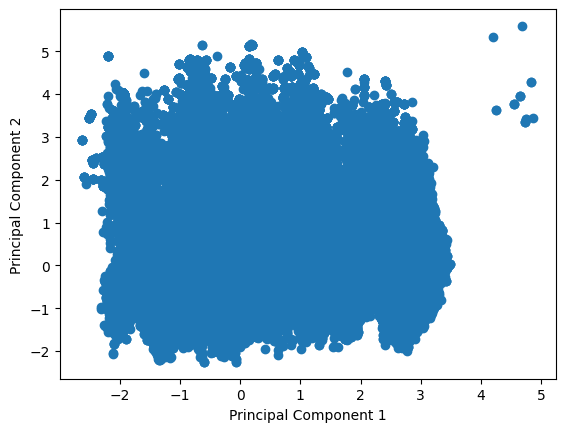

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
t = df
t = t.drop('datetime', axis=1)
t = t.drop('srcstr', axis=1)
t = t.drop('localeabbr', axis=1)
t = t.drop('time', axis=1)
t = t.drop('hour', axis=1)
t = t.drop('postalcode', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

t.host = le.fit_transform(t.host)
t.proto = le.fit_transform(t.proto)
t.cc = le.fit_transform(t.cc)
t.month = le.fit_transform(t.month)
t = t.dropna()
t.head()

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,China,Jiangxi Sheng,28.5500,115.9333,13,3,3
2,2,2947856490,1,2489.0,1080.0,159,Taiwan,Taipei,25.0392,121.5250,13,3,3
3,7,841842716,2,43235.0,1900.0,163,United States,Oregon,45.5848,-122.9117,13,3,3
5,6,3323217250,1,32628.0,2323.0,163,United States,Illinois,41.8825,-87.6441,13,3,3
6,2,3730416887,1,6000.0,1433.0,34,China,Henan Sheng,34.6836,113.5325,13,3,3
